In [1]:
#imports
import numpy as np
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from scipy.stats import pearsonr
import time
from joblib import Parallel, delayed
import gc
import psutil
import os

In [2]:
# Download and extract the data and learn_decoder.py
# !wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id=1xZaorRH-xxjfochvSesAhOTUg82_Xq56' -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id=1xZaorRH-xxjfochvSesAhOTUg82_Xq56" -O files.zip && rm -rf /tmp/cookies.txt
!wget --header="Host: drive.usercontent.google.com" --header="Accept: text/html,application/xhtml+xml,application/xml;q=0.9,image/avif,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.7" --header="Accept-Language: en-US,en;q=0.9,he;q=0.8" --header="Cookie: HSID=AHJfxja1o67aaDDKP; SSID=AcFaYUEeiC88MwrF9; APISID=-FXvHmBvJ828Jrpq/AaIp_RI6gKwBAA-zy; SAPISID=_psqReiv0O2WdiVv/AhLpZThJtVNAPgAJP; __Secure-1PAPISID=_psqReiv0O2WdiVv/AhLpZThJtVNAPgAJP; __Secure-3PAPISID=_psqReiv0O2WdiVv/AhLpZThJtVNAPgAJP; S=billing-ui-v3=pX9aAWC8SzxQZfQvQ-0SbCFRz65PPkVY:billing-ui-v3-efe=pX9aAWC8SzxQZfQvQ-0SbCFRz65PPkVY:maestro=dsv3G-owxPD6uTATLH0lBQZNadhFo6ZKJiuB9usoQVU; __Secure-BUCKET=CPgG; SID=g.a000kggtmVDh8D92rqHe5fiG-bMoXQw7Ld8Tf_C8qHhSE2ZoFUyx_uObP_F4bCqI8I561ccGMwACgYKAWESARQSFQHGX2Mi5DnhBiJ2gjjbMSP0XJbU5BoVAUF8yKrlBjWMdNOfGnmA7TZzmbWD0076; __Secure-1PSID=g.a000kggtmVDh8D92rqHe5fiG-bMoXQw7Ld8Tf_C8qHhSE2ZoFUyx2BFINS8lXhFUyAFwuvl8CQACgYKAW4SARQSFQHGX2MiWd6bHkI0JN89-1dFZUbS2hoVAUF8yKpc-H3AD8N6tj-dmFG21SeE0076; __Secure-3PSID=g.a000kggtmVDh8D92rqHe5fiG-bMoXQw7Ld8Tf_C8qHhSE2ZoFUyxJl_TGsCsjeiVN72q3lSCWQACgYKASASARQSFQHGX2MiULluXa7aABDwxgCWjB6IyhoVAUF8yKoy_HHYLCqIFMwNjx-GwYWe0076; __Secure-ENID=20.SE=jyM_w2hA8DW6FvPOh9wudde93a0A9P41Epzo098LV_LyU79-VVcJ9K-vNLrhCLuVzi69CyV4RxlSls8AAT9J8odwIXi_ISVn8Z1U1DH52BC3YiwOwO9LKUsBesCbGx2D6u1XwZ5GIP_PZMo1tkLLJq2VCtcxRP9OtC_QgHNbAD4eyc1TTu1C8XbZLFTOIgb0k9IfM2bMBXeha6t3sJysARZWpDIzs3I8wWZ5JtABB253grtjQyCnxyy9MUgTcYAVaoEGwgVHV4V4lSY6gydFkO2gYxl7JqYloqCq74HahGK54TBlsGZIOTM_KvFAsIidcrPaVOBpH6IGQTPChxy3Tr-GLK7VpBiQ8JW7V0xC8XTN1crEaaZnGFQ6MrjDv8f3hCY0Kg; AEC=AQTF6HwEtUB747fVHMzvOWJV9pmRoGs8Ix8FJ1HTrxbE9NY1dtyro2AvNQ; NID=515=Wdt0NWZqVSh3TtdIfjXCGTCCkj7jaJjt-lkOL3hLD_hPSSMyGxKkVthECwGGFbbxmvfM2iKZ1SkPGDVgLwjghAOrV9Ya7iEJJ0eSXZSfszc0WxRXm3Jy6LxqPEZLmY8v3AIkMX-o8KE5ZRXGEzgv_s9pfgS8bmeiIGT13Iiyw9tPzRZDChGijNbZ0Mp1oF-4YKikOZCyo8Km9wXOgLAC9dbeIqAlTdER97cQ7B5GajyRLH_bFrg0lCVN4tyZEycjihHOu6Eq_V88rswgV7uvzemJ_yk4WbbIWJVm9NCO4tWdDQG8NY3EY57xAJbmIhu260jDftYwzjCnpqJ8C1iCm-FjboF6xJwKJEtLkCXagIcSWxfPGqRWIn5KY72ogAMZTlUZ5RE5F8bH4sFgkt5pW_AalY5mxYPOfZgF-9hcJYsF71rMOic6mqSfvR8iNo-k6_SZ-4o5WkYxbwdLgiaIOiCJHkhIGBoXsm5hh5BHDqlk5ERGnFn5zpqOguNLJFjXT3nhaP1g_a2fFvd0bmZw2A9Y6tBNAC7CbDOmSHSmYmLag0qVcqu286CZh5svuhdM-QPcSCt5u0kPgfWN3KBha0G9L9qCiDIwntvnlVNoUYLBM4je1bhGjO9M2tdH_vteLo4vjm9Cq-4I2A; __Secure-1PSIDTS=sidts-CjIB3EgAEi6AJoaJlu_IOdqmparuSFUne3RqD5YKK5hcqKjRlc0CTp9lSpyH2OoVVoqmlxAA; __Secure-3PSIDTS=sidts-CjIB3EgAEi6AJoaJlu_IOdqmparuSFUne3RqD5YKK5hcqKjRlc0CTp9lSpyH2OoVVoqmlxAA; SIDCC=AKEyXzW7IJ8miV8hX_pqzqqPW7--eMWuWfausspLBoDPlfZDCRZDED56ohpancLYOBPizfUzi1aM; __Secure-1PSIDCC=AKEyXzVGnmSuG07J22njRVFPQ_sk88MgnqtYxJd-M0_9Pz3jdh4GpGPhPOqCMrayTU9SJTW3n54; __Secure-3PSIDCC=AKEyXzVScJYbKdtIImPYKpTRkExsc5UhC5n9Rkk8wNFlMZNW3_xkvWlimAXWaZ4T7kTcJy5AE4I" --header="Connection: keep-alive" "https://drive.usercontent.google.com/download?id=1xZaorRH-xxjfochvSesAhOTUg82_Xq56&export=download&authuser=0&confirm=t&uuid=efeb9ce5-a5c5-453b-938d-6c0ece963f3c&at=APZUnTV18b5mSao0MQ2JbtpefTxr%3A1719665236172" -c -O 'files.zip'
!unzip files.zip
!rm files.zip

--2025-08-20 08:12:04--  https://drive.usercontent.google.com/download?id=1xZaorRH-xxjfochvSesAhOTUg82_Xq56&export=download&authuser=0&confirm=t&uuid=efeb9ce5-a5c5-453b-938d-6c0ece963f3c&at=APZUnTV18b5mSao0MQ2JbtpefTxr%3A1719665236172
Resolving drive.usercontent.google.com (drive.usercontent.google.com)... 173.194.217.132, 2607:f8b0:400c:c13::84
Connecting to drive.usercontent.google.com (drive.usercontent.google.com)|173.194.217.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 97708666 (93M) [application/octet-stream]
Saving to: ‘files.zip’

files.zip           100%[===================>]  93.18M  71.7MB/s    in 1.3s    

2025-08-20 08:12:07 (71.7 MB/s) - ‘files.zip’ saved [97708666/97708666]

Archive:  files.zip
  inflating: stimuli_180concepts.txt  
  inflating: learn_decoder.py        
  inflating: vectors_180concepts.GV42B300.txt  
  inflating: imaging_data.csv        


In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
import os

folder_path = "/content/drive/MyDrive/Project Resources - Lang&Cog/Project 2: Word Embeddings and the Brain/Structured Task (sentence decoding)"
print(os.listdir(folder_path))

['stimuli_243sentences.txt', 'stimuli_384sentences.txt', 'vectors_243sentences.GV42B300.average.txt', 'vectors_384sentences.GV42B300.average.txt', 'EXP3.pkl', 'EXP2.pkl', 'neuralData_for_EXP1.csv']


In [6]:
sentences_384 = np.loadtxt(os.path.join(folder_path, "stimuli_384sentences.txt"), dtype=str, delimiter='.')

In [7]:
import pickle
with open(os.path.join(folder_path, "EXP2.pkl"), "rb") as f:
    exp2 = pickle.load(f)

In [8]:
data_384 = exp2["Fmridata"]  # shape (384, 185866)

In [9]:
vectors_glove_384 = np.loadtxt(os.path.join(folder_path, "vectors_384sentences.GV42B300.average.txt"))

In [10]:
data_brain = data_384  # Shape: (384, 185866) - brain data
vectors_static = vectors_glove_384  # Shape: (384, 300) - GloVe vectors

In [11]:
print(f"Brain data shape: {data_brain.shape}")
print(f"Static vectors shape: {vectors_static.shape}")

Brain data shape: (384, 185866)
Static vectors shape: (384, 300)


In [12]:
from transformers import BertTokenizer, BertModel
import torch

def get_bert_sentence_embeddings(sentences, model_name='bert-base-uncased'):
    """Extract BERT sentence embeddings"""
    tokenizer = BertTokenizer.from_pretrained(model_name)
    model = BertModel.from_pretrained(model_name)
    model.eval()

    embeddings = []
    with torch.no_grad():
        for sentence in sentences:
            # Tokenize and encode
            inputs = tokenizer(sentence, return_tensors='pt',
                             truncation=True, max_length=512, padding=True)

            # Get BERT output
            outputs = model(**inputs)

            # Use [CLS] token embedding as sentence representation
            sentence_embedding = outputs.last_hidden_state[0, 0, :].numpy()
            embeddings.append(sentence_embedding)

    return np.array(embeddings)

# Load sentences and create BERT embeddings
with open(os.path.join(folder_path, "stimuli_384sentences.txt"), "r") as f:
    sentences_384 = [line.strip() for line in f.readlines()]

# Create BERT embeddings
print("Creating BERT embeddings...")
vectors_contextual = get_bert_sentence_embeddings(sentences_384)
print(f"BERT vectors shape: {vectors_contextual.shape}")

Creating BERT embeddings...


/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

BERT vectors shape: (384, 768)


In [13]:
def huth_style_voxel_encoder(embeddings, voxel_data, alpha=183.3,
                            test_size=0.2, standardize=True, random_state=42):

    # Split data for proper validation
    X_train, X_test, y_train, y_test = train_test_split(
        embeddings, voxel_data, test_size=test_size, random_state=random_state
    )

    # Standardize features within each split (like Huth et al.)
    if standardize:
        scaler = StandardScaler()
        X_train_scaled = scaler.fit_transform(X_train)
        X_test_scaled = scaler.transform(X_test)
    else:
        X_train_scaled = X_train
        X_test_scaled = X_test

    # Z-score voxel responses within training set
    y_train_mean = np.mean(y_train)
    y_train_std = np.std(y_train)
    if y_train_std > 0:
        y_train_norm = (y_train - y_train_mean) / y_train_std
        y_test_norm = (y_test - y_train_mean) / y_train_std  # Use training stats
    else:
        return {
            'correlation': 0.0,
            'r2': 0.0,
            'p_value': 1.0,
            'n_train': len(y_train),
            'n_test': len(y_test),
            'alpha': alpha,
            'valid': False
        }

    # Fit Ridge regression (Huth et al. approach)
    model = Ridge(alpha=alpha, fit_intercept=True)
    model.fit(X_train_scaled, y_train_norm)

    # Predict on held-out test data
    y_pred = model.predict(X_test_scaled)

    # Calculate correlation (Huth's primary metric)
    correlation, p_value = pearsonr(y_test_norm, y_pred)

    # Also calculate R² for comparison
    r2 = r2_score(y_test_norm, y_pred)

    return {
        'correlation': correlation,
        'r2': r2,
        'p_value': p_value,
        'n_train': len(y_train),
        'n_test': len(y_test),
        'alpha': alpha,
        'valid': True
    }

def process_voxel_huth_style(args):
    """Wrapper for parallel processing"""
    voxel_idx, embeddings, fmri_data, alpha, test_size, standardize, random_state = args
    voxel_data = fmri_data[:, voxel_idx]
    result = huth_style_voxel_encoder(
        embeddings, voxel_data, alpha, test_size, standardize, random_state
    )
    return voxel_idx, result

def huth_style_brain_encoding(embeddings, fmri_data, embedding_name,
                             sample_voxels=1000, alpha=183.3, test_size=0.2,
                             standardize=True, n_jobs=2, batch_size=500,
                             random_state=42):
    """
    Brain encoding analysis following Huth et al. methodology

    Key features from Huth et al.:
    - Uses correlation as primary metric (not just R²)
    - Proper train/test splits for validation
    - Z-score normalization of features and responses
    - Ridge regression with fixed alpha (183.3 from their paper)
    """
    n_sentences, n_voxels = fmri_data.shape
    n_features = embeddings.shape[1]

    print(f"=== Huth-style Brain Encoding: {embedding_name} ===")
    print(f"Data: {n_sentences} sentences × {n_voxels} voxels")
    print(f"Embedding dim: {n_features}")
    print(f"Ridge alpha: {alpha} (Huth et al. optimal value)")
    print(f"Test size: {test_size}")
    print(f"Standardize: {standardize}")

    # Sample voxels (default to 1000 for testing)
    if sample_voxels is not None and sample_voxels < n_voxels:
        np.random.seed(random_state)
        voxel_indices = np.random.choice(n_voxels, size=sample_voxels, replace=False)
        print(f"Analyzing {sample_voxels} randomly sampled voxels")
    else:
        voxel_indices = np.arange(n_voxels)
        print(f"Analyzing all {n_voxels} voxels (WARNING: This may take hours!)")
        if n_voxels > 10000:
            print(f"   Consider setting sample_voxels=1000 for faster testing")

    n_voxels_to_process = len(voxel_indices)

    # Initialize results storage
    results = {
        'correlations': np.full(n_voxels_to_process, np.nan),
        'r2_scores': np.full(n_voxels_to_process, np.nan),
        'p_values': np.full(n_voxels_to_process, np.nan),
        'valid_voxels': np.zeros(n_voxels_to_process, dtype=bool),
        'voxel_indices': voxel_indices,
        'embedding_name': embedding_name,
        'alpha': alpha,
        'n_sentences': n_sentences,
        'n_features': n_features
    }

    # Process in batches
    n_batches = (n_voxels_to_process + batch_size - 1) // batch_size
    start_time = time.time()

    for batch_idx in range(n_batches):
        batch_start = batch_idx * batch_size
        batch_end = min((batch_idx + 1) * batch_size, n_voxels_to_process)
        batch_voxel_indices = voxel_indices[batch_start:batch_end]

        print(f"\nBatch {batch_idx + 1}/{n_batches}: Processing voxels {batch_start + 1}-{batch_end}")
        batch_start_time = time.time()

        # Prepare arguments for parallel processing
        args_list = [
            (voxel_idx, embeddings, fmri_data, alpha, test_size, standardize, random_state)
            for voxel_idx in batch_voxel_indices
        ]

        # Parallel processing
        batch_results = Parallel(n_jobs=n_jobs, verbose=0)(
            delayed(process_voxel_huth_style)(args) for args in args_list
        )

        # Store results with safe key access
        for i, (voxel_idx, result) in enumerate(batch_results):
            global_idx = batch_start + i
            results['correlations'][global_idx] = result.get('correlation', 0.0)
            results['r2_scores'][global_idx] = result.get('r2', 0.0)
            results['p_values'][global_idx] = result.get('p_value', 1.0)
            results['valid_voxels'][global_idx] = result.get('valid', False)

        # Progress update
        batch_time = time.time() - batch_start_time
        elapsed_total = time.time() - start_time
        completed = batch_end

        if completed > 0:
            rate = completed / elapsed_total
            remaining = n_voxels_to_process - completed
            eta_minutes = (remaining / rate) / 60 if rate > 0 else 0

            # Current statistics (only valid voxels)
            current_valid = results['valid_voxels'][:completed]
            if np.sum(current_valid) > 0:
                current_corr = results['correlations'][:completed][current_valid]
                current_r2 = results['r2_scores'][:completed][current_valid]

                print(f"  Batch time: {batch_time:.1f}s | Total: {elapsed_total/60:.1f}min")
                print(f"  Progress: {completed}/{n_voxels_to_process} ({100*completed/n_voxels_to_process:.1f}%)")
                print(f"  Rate: {rate:.1f} voxels/sec | ETA: {eta_minutes:.1f} min")
                print(f"  Valid voxels: {np.sum(current_valid)}/{completed}")
                print(f"  Mean correlation: {np.mean(current_corr):.4f} ± {np.std(current_corr):.4f}")
                print(f"  Mean R²: {np.mean(current_r2):.4f} ± {np.std(current_r2):.4f}")
                print(f"  Positive correlation: {np.sum(current_corr > 0)}/{len(current_corr)} ({100*np.sum(current_corr > 0)/len(current_corr):.1f}%)")

    total_time = time.time() - start_time

    # Final summary
    valid_mask = results['valid_voxels']
    n_valid = np.sum(valid_mask)

    print(f"\n Huth-style analysis complete for {embedding_name}!")
    print(f"   Total time: {total_time/60:.1f} minutes")
    print(f"   Valid voxels: {n_valid}/{n_voxels_to_process} ({100*n_valid/n_voxels_to_process:.1f}%)")

    if n_valid > 0:
        corr_valid = results['correlations'][valid_mask]
        r2_valid = results['r2_scores'][valid_mask]

        print(f"\n   === CORRELATION RESULTS (Huth's primary metric) ===")
        print(f"   Mean correlation: {np.mean(corr_valid):.4f} ± {np.std(corr_valid):.4f}")
        print(f"   Range: [{np.min(corr_valid):.4f}, {np.max(corr_valid):.4f}]")
        print(f"   Positive correlation: {np.sum(corr_valid > 0)}/{n_valid} ({100*np.sum(corr_valid > 0)/n_valid:.1f}%)")

        print(f"\n   === R² RESULTS (for comparison) ===")
        print(f"   Mean R²: {np.mean(r2_valid):.4f} ± {np.std(r2_valid):.4f}")
        print(f"   Range: [{np.min(r2_valid):.4f}, {np.max(r2_valid):.4f}]")
        print(f"   Positive R²: {np.sum(r2_valid > 0)}/{n_valid} ({100*np.sum(r2_valid > 0)/n_valid:.1f}%)")

        # Significance analysis (like Huth et al.)
        # Note: This is approximate - real significance needs FDR correction
        p_valid = results['p_values'][valid_mask]
        n_significant_05 = np.sum(p_valid < 0.05)
        n_significant_01 = np.sum(p_valid < 0.01)

        print(f"\n   === SIGNIFICANCE (uncorrected p-values) ===")
        print(f"   p < 0.05: {n_significant_05}/{n_valid} ({100*n_significant_05/n_valid:.1f}%)")
        print(f"   p < 0.01: {n_significant_01}/{n_valid} ({100*n_significant_01/n_valid:.1f}%)")

        # Correlation thresholds (more meaningful than R² for Huth-style analysis)
        for threshold in [0.05, 0.1, 0.15, 0.2, 0.25]:
            n_above = np.sum(corr_valid > threshold)
            print(f"   Correlation > {threshold}: {n_above}/{n_valid} ({100*n_above/n_valid:.1f}%)")

    return results

def compare_huth_encoding_results(results_static, results_contextual,
                                 static_name="GloVe", contextual_name="BERT"):
    """Compare two Huth-style encoding analyses"""

    # Get valid results for both
    valid_static = results_static['valid_voxels']
    valid_contextual = results_contextual['valid_voxels']
    valid_both = valid_static & valid_contextual

    print(f"=== Huth-style Comparison: {static_name} vs {contextual_name} ===")
    print(f"Valid in both: {np.sum(valid_both)}/{len(valid_both)} voxels")

    if np.sum(valid_both) == 0:
        print("No voxels valid in both conditions!")
        return

    # Extract correlations for valid voxels (Huth's primary metric)
    corr_static = results_static['correlations'][valid_both]
    corr_contextual = results_contextual['correlations'][valid_both]
    r2_static = results_static['r2_scores'][valid_both]
    r2_contextual = results_contextual['r2_scores'][valid_both]

    # Statistics
    print(f"\n{static_name} Correlations:")
    print(f"  Mean: {np.mean(corr_static):.4f} ± {np.std(corr_static):.4f}")
    print(f"  Median: {np.median(corr_static):.4f}")
    print(f"  Positive: {np.sum(corr_static > 0)}/{len(corr_static)} ({100*np.sum(corr_static > 0)/len(corr_static):.1f}%)")

    print(f"\n{contextual_name} Correlations:")
    print(f"  Mean: {np.mean(corr_contextual):.4f} ± {np.std(corr_contextual):.4f}")
    print(f"  Median: {np.median(corr_contextual):.4f}")
    print(f"  Positive: {np.sum(corr_contextual > 0)}/{len(corr_contextual)} ({100*np.sum(corr_contextual > 0)/len(corr_contextual):.1f}%)")

    # Improvement analysis
    corr_improvement = corr_contextual - corr_static
    r2_improvement = r2_contextual - r2_static
    n_corr_improved = np.sum(corr_improvement > 0)
    n_r2_improved = np.sum(r2_improvement > 0)

    print(f"\nImprovement Analysis:")
    print(f"  {contextual_name} better (correlation): {n_corr_improved}/{len(corr_improvement)} ({100*n_corr_improved/len(corr_improvement):.1f}%)")
    print(f"  {contextual_name} better (R²): {n_r2_improved}/{len(r2_improvement)} ({100*n_r2_improved/len(r2_improvement):.1f}%)")
    print(f"  Mean correlation improvement: {np.mean(corr_improvement):.4f} ± {np.std(corr_improvement):.4f}")
    print(f"  Mean R² improvement: {np.mean(r2_improvement):.4f} ± {np.std(r2_improvement):.4f}")

    # Visualizations
    fig, axes = plt.subplots(2, 2, figsize=(12, 10))

    # Correlation distributions
    axes[0,0].hist(corr_static, bins=30, alpha=0.6, label=static_name, density=True)
    axes[0,0].hist(corr_contextual, bins=30, alpha=0.6, label=contextual_name, density=True)
    axes[0,0].set_xlabel('Correlation')
    axes[0,0].set_ylabel('Density')
    axes[0,0].set_title('Correlation Distributions (Huth primary metric)')
    axes[0,0].legend()
    axes[0,0].grid(True, alpha=0.3)

    # Correlation scatter plot
    axes[0,1].scatter(corr_static, corr_contextual, alpha=0.5, s=10)
    axes[0,1].plot([-0.5, 0.5], [-0.5, 0.5], 'r--', label='Equal performance')
    axes[0,1].set_xlabel(f'{static_name} Correlation')
    axes[0,1].set_ylabel(f'{contextual_name} Correlation')
    axes[0,1].set_title('Correlation Comparison')
    axes[0,1].legend()
    axes[0,1].grid(True, alpha=0.3)

    # R² distributions
    axes[1,0].hist(r2_static, bins=30, alpha=0.6, label=static_name, density=True)
    axes[1,0].hist(r2_contextual, bins=30, alpha=0.6, label=contextual_name, density=True)
    axes[1,0].set_xlabel('R² Score')
    axes[1,0].set_ylabel('Density')
    axes[1,0].set_title('R² Distributions')
    axes[1,0].legend()
    axes[1,0].grid(True, alpha=0.3)

    # Improvement distributions
    axes[1,1].hist(corr_improvement, bins=30, alpha=0.6, label='Correlation', density=True)
    axes[1,1].hist(r2_improvement, bins=30, alpha=0.6, label='R²', density=True)
    axes[1,1].axvline(0, color='red', linestyle='--', label='No improvement')
    axes[1,1].set_xlabel(f'Improvement ({contextual_name} - {static_name})')
    axes[1,1].set_ylabel('Density')
    axes[1,1].set_title('Improvement Distributions')
    axes[1,1].legend()
    axes[1,1].grid(True, alpha=0.3)

    plt.tight_layout()
    plt.show()

    return {
        'corr_static': corr_static,
        'corr_contextual': corr_contextual,
        'r2_static': r2_static,
        'r2_contextual': r2_contextual,
        'corr_improvement': corr_improvement,
        'r2_improvement': r2_improvement
    }

print(" Huth-style brain encoder ready!")
print("Key improvements over simple approach:")
print("- Uses correlation as primary metric (like Huth et al.)")
print("- Fixed Ridge alpha=183.3 (Huth's optimal value)")
print("- Proper z-score normalization of features and responses")
print("- Train/test validation with correlation-based evaluation")
print("- Significance testing framework")
print("- Default sample_voxels=1000 for fast testing (set to None for all voxels)")

# Quick usage example
def quick_huth_analysis(embeddings_static, embeddings_contextual, brain_data,
                       sample_size=1000):
    """
    Quick function to run Huth-style analysis with sampling

    Args:
        embeddings_static: GloVe vectors
        embeddings_contextual: BERT vectors
        brain_data: fMRI data
        sample_size: Number of voxels to sample (1000 for testing, None for all)
    """
    print(f"Running Huth-style analysis with {sample_size} voxels...")

    # GloVe analysis
    results_glove = huth_style_brain_encoding(
        embeddings_static, brain_data, "GloVe-300",
        sample_voxels=sample_size
    )

    print("\n" + "="*60 + "\n")

    # BERT analysis
    results_bert = huth_style_brain_encoding(
        embeddings_contextual, brain_data, "BERT-768",
        sample_voxels=sample_size
    )

    print("\n" + "="*60 + "\n")

    # Compare results
    comparison = compare_huth_encoding_results(results_glove, results_bert)

    return results_glove, results_bert, comparison

 Huth-style brain encoder ready!
Key improvements over simple approach:
- Uses correlation as primary metric (like Huth et al.)
- Fixed Ridge alpha=183.3 (Huth's optimal value)
- Proper z-score normalization of features and responses
- Train/test validation with correlation-based evaluation
- Significance testing framework
- Default sample_voxels=1000 for fast testing (set to None for all voxels)


Running Huth-style analysis with 1000 voxels...
=== Huth-style Brain Encoding: GloVe-300 ===
Data: 384 sentences × 185866 voxels
Embedding dim: 300
Ridge alpha: 183.3 (Huth et al. optimal value)
Test size: 0.2
Standardize: True
Analyzing 1000 randomly sampled voxels

Batch 1/2: Processing voxels 1-500
  Batch time: 8.9s | Total: 0.1min
  Progress: 500/1000 (50.0%)
  Rate: 56.2 voxels/sec | ETA: 0.1 min
  Valid voxels: 499/500
  Mean correlation: 0.0768 ± 0.1134
  Mean R²: -0.1913 ± 0.1226
  Positive correlation: 369/499 (73.9%)

Batch 2/2: Processing voxels 501-1000
  Batch time: 8.4s | Total: 0.3min
  Progress: 1000/1000 (100.0%)
  Rate: 57.9 voxels/sec | ETA: 0.0 min
  Valid voxels: 998/1000
  Mean correlation: 0.0752 ± 0.1145
  Mean R²: -0.1964 ± 0.1240
  Positive correlation: 726/998 (72.7%)

 Huth-style analysis complete for GloVe-300!
   Total time: 0.3 minutes
   Valid voxels: 998/1000 (99.8%)

   === CORRELATION RESULTS (Huth's primary metric) ===
   Mean correlation: 0.0752 ± 

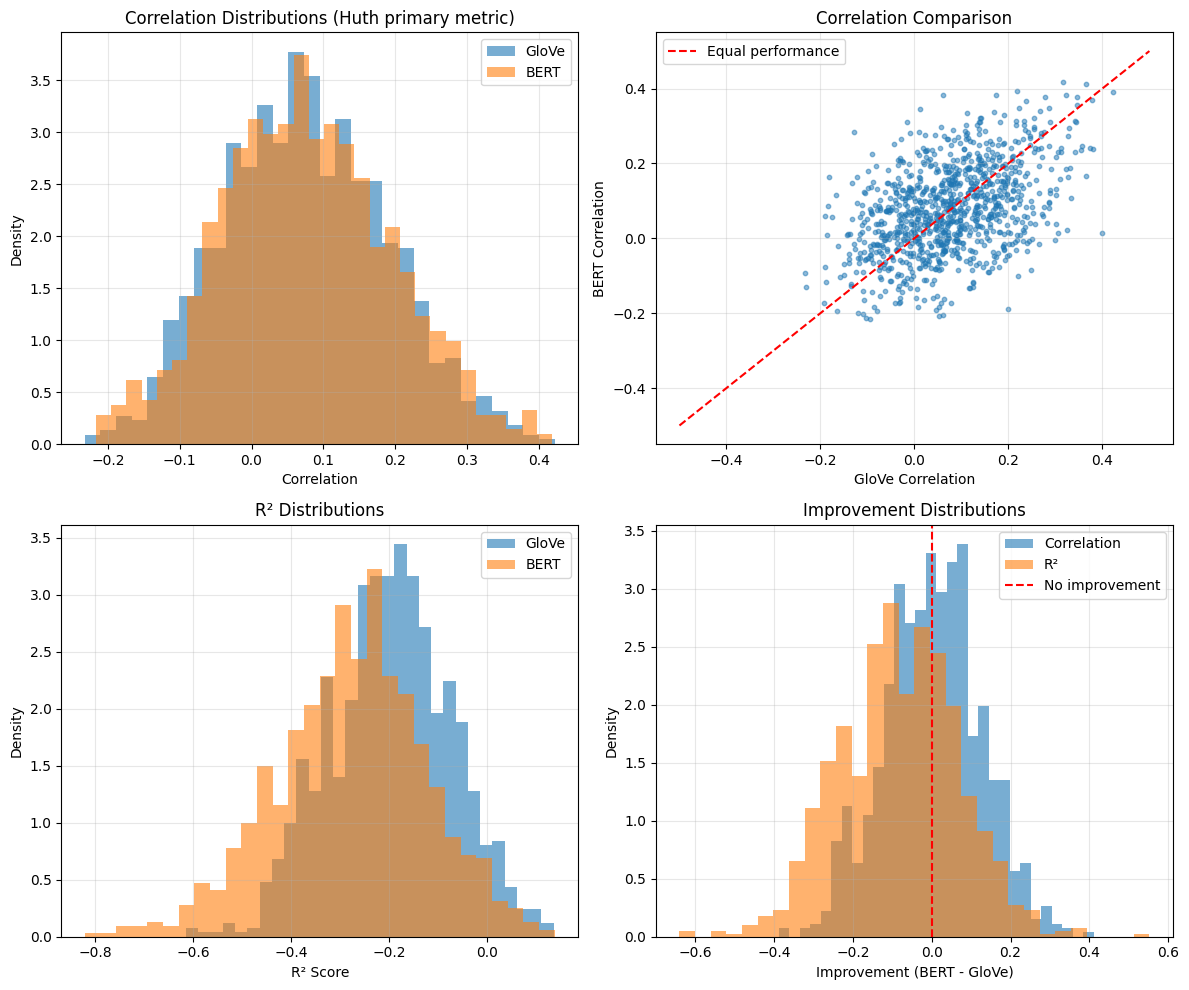

In [14]:
results_glove, results_bert, comparison = quick_huth_analysis(
    vectors_static,      # Your GloVe vectors
    vectors_contextual,  # Your BERT vectors
    data_brain,         # Your brain data
    sample_size=1000    # Default sample size
)

In [15]:
def get_optimal_n_jobs():
    """Get optimal number of parallel jobs for Colab"""
    # Check available cores and memory
    n_cores = os.cpu_count()
    available_memory_gb = psutil.virtual_memory().available / (1024**3)

    # Conservative settings for Colab stability
    if available_memory_gb > 10:
        n_jobs = min(n_cores, 4)  # Max 4 cores even if more available
    elif available_memory_gb > 6:
        n_jobs = min(n_cores, 2)  # Max 2 cores for medium memory
    else:
        n_jobs = 1  # Single core for low memory

    print(f"Detected {n_cores} cores, {available_memory_gb:.1f}GB available memory")
    print(f"Using {n_jobs} parallel jobs for optimal Colab performance")
    return n_jobs

def huth_voxel_encoder_fast(embeddings, voxel_data, alpha=183.3,
                           test_size=0.2, random_state=42):
    """Optimized single voxel encoder"""
    # Quick validity check
    if np.std(voxel_data) == 0 or np.any(np.isnan(voxel_data)):
        return {
            'correlation': 0.0, 'r2': 0.0, 'p_value': 1.0,
            'valid': False
        }

    # Split data
    X_train, X_test, y_train, y_test = train_test_split(
        embeddings, voxel_data, test_size=test_size, random_state=random_state
    )

    # Standardize features (critical for Ridge)
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Z-score voxel responses
    y_train_mean = np.mean(y_train)
    y_train_std = np.std(y_train)
    y_train_norm = (y_train - y_train_mean) / y_train_std
    y_test_norm = (y_test - y_train_mean) / y_train_std

    # Fit Ridge regression
    model = Ridge(alpha=alpha, fit_intercept=True)
    model.fit(X_train_scaled, y_train_norm)

    # Predict and evaluate
    y_pred = model.predict(X_test_scaled)
    correlation, p_value = pearsonr(y_test_norm, y_pred)
    r2 = r2_score(y_test_norm, y_pred)

    return {
        'correlation': correlation,
        'r2': r2,
        'p_value': p_value,
        'valid': True
    }

def process_voxel_batch(args):
    """Process a batch of voxels - optimized for memory"""
    voxel_indices, embeddings, fmri_data, alpha, test_size, random_state = args

    batch_results = []
    for voxel_idx in voxel_indices:
        voxel_data = fmri_data[:, voxel_idx]
        result = huth_voxel_encoder_fast(
            embeddings, voxel_data, alpha, test_size, random_state
        )
        batch_results.append((voxel_idx, result))

    return batch_results

def full_huth_analysis_optimized(embeddings, fmri_data, embedding_name,
                                alpha=183.3, test_size=0.2,
                                voxel_batch_size=100, parallel_batch_size=1000,
                                random_state=42):
    """
    Full brain analysis optimized for Google Colab

    Args:
        embeddings: Sentence embeddings
        fmri_data: Full brain data (384 x 185866)
        embedding_name: Name for this analysis
        alpha: Ridge regularization (Huth's optimal: 183.3)
        test_size: Train/test split ratio
        voxel_batch_size: Voxels per parallel job (smaller = more parallel)
        parallel_batch_size: Voxels processed before memory cleanup
        random_state: Reproducibility seed
    """
    n_sentences, n_voxels = fmri_data.shape
    n_features = embeddings.shape[1]

    # Get optimal parallelization
    n_jobs = get_optimal_n_jobs()

    print(f"=== FULL Huth-style Analysis: {embedding_name} ===")
    print(f" Data: {n_sentences} sentences × {n_voxels:,} voxels")
    print(f" Features: {n_features} dimensions")
    print(f"  Ridge α: {alpha} (Huth optimal)")
    print(f" Parallel jobs: {n_jobs}")
    print(f" Batch sizes: {voxel_batch_size} voxels/job, {parallel_batch_size} voxels/cleanup")
    print(f" Estimated time: {(n_voxels / 1000) * 0.2:.1f}-{(n_voxels / 1000) * 0.5:.1f} minutes")

    # Initialize results storage
    results = {
        'correlations': np.full(n_voxels, np.nan, dtype=np.float32),
        'r2_scores': np.full(n_voxels, np.nan, dtype=np.float32),
        'p_values': np.full(n_voxels, np.nan, dtype=np.float32),
        'valid_voxels': np.zeros(n_voxels, dtype=bool),
        'embedding_name': embedding_name,
        'n_voxels': n_voxels,
        'n_sentences': n_sentences,
        'n_features': n_features
    }

    # Process in large batches for memory management
    n_parallel_batches = (n_voxels + parallel_batch_size - 1) // parallel_batch_size
    start_time = time.time()

    for big_batch_idx in range(n_parallel_batches):
        big_batch_start = big_batch_idx * parallel_batch_size
        big_batch_end = min((big_batch_idx + 1) * parallel_batch_size, n_voxels)
        big_batch_voxels = list(range(big_batch_start, big_batch_end))

        print(f"\n Processing batch {big_batch_idx + 1}/{n_parallel_batches}")
        print(f"   Voxels {big_batch_start:,}-{big_batch_end-1:,} ({len(big_batch_voxels):,} voxels)")

        batch_start_time = time.time()

        # Split into smaller batches for parallel processing
        small_batches = []
        for i in range(0, len(big_batch_voxels), voxel_batch_size):
            batch_voxel_indices = big_batch_voxels[i:i + voxel_batch_size]
            small_batches.append((
                batch_voxel_indices, embeddings, fmri_data,
                alpha, test_size, random_state
            ))

        print(f"{len(small_batches)} parallel jobs of ~{voxel_batch_size} voxels each")

        # Parallel processing of small batches
        try:
            batch_results = Parallel(n_jobs=n_jobs, verbose=0, backend='threading')(
                delayed(process_voxel_batch)(args) for args in small_batches
            )

            # Store results
            for small_batch_results in batch_results:
                for voxel_idx, result in small_batch_results:
                    results['correlations'][voxel_idx] = result.get('correlation', 0.0)
                    results['r2_scores'][voxel_idx] = result.get('r2', 0.0)
                    results['p_values'][voxel_idx] = result.get('p_value', 1.0)
                    results['valid_voxels'][voxel_idx] = result.get('valid', False)

        except Exception as e:
            print(f"     Error in batch {big_batch_idx + 1}: {e}")
            print(f"   Continuing with next batch...")
            continue

        # Progress reporting
        batch_time = time.time() - batch_start_time
        elapsed_total = time.time() - start_time
        completed_voxels = big_batch_end

        # Calculate statistics for completed voxels
        valid_so_far = results['valid_voxels'][:completed_voxels]
        if np.sum(valid_so_far) > 0:
            corr_so_far = results['correlations'][:completed_voxels][valid_so_far]
            r2_so_far = results['r2_scores'][:completed_voxels][valid_so_far]

            # Timing estimates
            rate = completed_voxels / elapsed_total
            remaining_voxels = n_voxels - completed_voxels
            eta_minutes = (remaining_voxels / rate) / 60 if rate > 0 else 0

            print(f"    Batch completed in {batch_time:.1f}s")
            print(f"    Progress: {completed_voxels:,}/{n_voxels:,} ({100*completed_voxels/n_voxels:.1f}%)")
            print(f"    Rate: {rate:.0f} voxels/sec")
            print(f"    ETA: {eta_minutes:.1f} minutes")
            print(f"    Current stats:")
            print(f"      Valid: {np.sum(valid_so_far):,}/{completed_voxels:,} ({100*np.sum(valid_so_far)/completed_voxels:.1f}%)")
            print(f"      Mean r: {np.mean(corr_so_far):.4f} ± {np.std(corr_so_far):.4f}")
            print(f"      Positive r: {np.sum(corr_so_far > 0):,}/{len(corr_so_far):,} ({100*np.sum(corr_so_far > 0)/len(corr_so_far):.1f}%)")
            print(f"      Max r: {np.max(corr_so_far):.3f}")

        # Memory cleanup
        gc.collect()

    total_time = time.time() - start_time

    # Final comprehensive summary
    valid_mask = results['valid_voxels']
    n_valid = np.sum(valid_mask)

    print(f"\n FULL ANALYSIS COMPLETE: {embedding_name}")
    print(f" Total time: {total_time/60:.1f} minutes ({total_time/3600:.2f} hours)")
    print(f" Total voxels: {n_voxels:,}")
    print(f" Valid voxels: {n_valid:,} ({100*n_valid/n_voxels:.1f}%)")

    if n_valid > 0:
        corr_valid = results['correlations'][valid_mask]
        r2_valid = results['r2_scores'][valid_mask]
        p_valid = results['p_values'][valid_mask]

        print(f"\n CORRELATION RESULTS (Huth primary metric):")
        print(f"   Mean: {np.mean(corr_valid):.4f} ± {np.std(corr_valid):.4f}")
        print(f"   Median: {np.median(corr_valid):.4f}")
        print(f"   Range: [{np.min(corr_valid):.3f}, {np.max(corr_valid):.3f}]")
        print(f"   Positive: {np.sum(corr_valid > 0):,}/{n_valid:,} ({100*np.sum(corr_valid > 0)/n_valid:.1f}%)")

        print(f"\n R² RESULTS (for comparison):")
        print(f"   Mean: {np.mean(r2_valid):.4f} ± {np.std(r2_valid):.4f}")
        print(f"   Positive: {np.sum(r2_valid > 0):,}/{n_valid:,} ({100*np.sum(r2_valid > 0)/n_valid:.1f}%)")

        print(f"\n SIGNIFICANCE ANALYSIS:")
        n_sig_05 = np.sum(p_valid < 0.05)
        n_sig_01 = np.sum(p_valid < 0.01)
        n_sig_001 = np.sum(p_valid < 0.001)
        print(f"   p < 0.05: {n_sig_05:,}/{n_valid:,} ({100*n_sig_05/n_valid:.1f}%)")
        print(f"   p < 0.01: {n_sig_01:,}/{n_valid:,} ({100*n_sig_01/n_valid:.1f}%)")
        print(f"   p < 0.001: {n_sig_001:,}/{n_valid:,} ({100*n_sig_001/n_valid:.1f}%)")

        print(f"\n EFFECT SIZE THRESHOLDS:")
        for threshold in [0.05, 0.1, 0.15, 0.2, 0.25, 0.3]:
            n_above = np.sum(corr_valid > threshold)
            print(f"   r > {threshold}: {n_above:,}/{n_valid:,} ({100*n_above/n_valid:.1f}%)")

    return results

def quick_comparison_full(results_static, results_contextual,
                         static_name="GloVe", contextual_name="BERT"):
    """Quick comparison of full results"""
    valid_both = results_static['valid_voxels'] & results_contextual['valid_voxels']
    n_valid = np.sum(valid_both)

    if n_valid == 0:
        print(" No voxels valid in both conditions!")
        return

    corr_static = results_static['correlations'][valid_both]
    corr_contextual = results_contextual['correlations'][valid_both]

    improvement = corr_contextual - corr_static
    n_improved = np.sum(improvement > 0)

    print(f"\n FULL BRAIN COMPARISON: {static_name} vs {contextual_name}")
    print(f" Valid in both: {n_valid:,} voxels")
    print(f" {static_name}: r = {np.mean(corr_static):.4f} ± {np.std(corr_static):.4f}")
    print(f" {contextual_name}: r = {np.mean(corr_contextual):.4f} ± {np.std(corr_contextual):.4f}")
    print(f"  {contextual_name} better: {n_improved:,}/{n_valid:,} ({100*n_improved/n_valid:.1f}%)")
    print(f" Mean improvement: {np.mean(improvement):.4f} ± {np.std(improvement):.4f}")

    return {
        'corr_static': corr_static,
        'corr_contextual': corr_contextual,
        'improvement': improvement,
        'n_valid': n_valid
    }

# Usage function
def run_full_analysis(vectors_static, vectors_contextual, data_brain):
    """
    Run the complete full-brain analysis
    """
    print(" Starting FULL BRAIN Huth-style analysis...")
    print("  This will analyze ALL 185,866 voxels")

    # GloVe analysis
    print("\n" + "="*80)
    results_glove_full = full_huth_analysis_optimized(
        embeddings=vectors_static,
        fmri_data=data_brain,
        embedding_name="GloVe-300",
        alpha=183.3,
        voxel_batch_size=50,    # Smaller batches for more parallelization
        parallel_batch_size=2000,  # Process 2000 voxels before cleanup
        random_state=42
    )

    # Memory cleanup before BERT
    gc.collect()

    # BERT analysis
    print("\n" + "="*80)
    results_bert_full = full_huth_analysis_optimized(
        embeddings=vectors_contextual,
        fmri_data=data_brain,
        embedding_name="BERT-768",
        alpha=183.3,
        voxel_batch_size=50,    # Smaller for BERT (higher dimensional)
        parallel_batch_size=1500,  # Smaller batches for BERT
        random_state=42
    )

    # Compare results
    print("\n" + "="*80)
    comparison = quick_comparison_full(results_glove_full, results_bert_full)

    return results_glove_full, results_bert_full, comparison

print("Full analysis functions ready!")
print("Optimized for Google Colab with maximum parallelization")
print("Usage: results_g, results_b, comp = run_full_analysis(vectors_static, vectors_contextual, data_brain)")
print("Expected time: 30-60 minutes for full brain (185k voxels)")

Full analysis functions ready!
Optimized for Google Colab with maximum parallelization
Usage: results_g, results_b, comp = run_full_analysis(vectors_static, vectors_contextual, data_brain)
Expected time: 30-60 minutes for full brain (185k voxels)


In [16]:
# Run the complete full-brain analysis
results_glove_full, results_bert_full, comparison_full = run_full_analysis(
    vectors_static, vectors_contextual, data_brain
)

 Starting FULL BRAIN Huth-style analysis...
  This will analyze ALL 185,866 voxels

Detected 2 cores, 8.2GB available memory
Using 2 parallel jobs for optimal Colab performance
=== FULL Huth-style Analysis: GloVe-300 ===
 Data: 384 sentences × 185,866 voxels
 Features: 300 dimensions
  Ridge α: 183.3 (Huth optimal)
 Parallel jobs: 2
 Batch sizes: 50 voxels/job, 2000 voxels/cleanup
 Estimated time: 37.2-92.9 minutes

 Processing batch 1/93
   Voxels 0-1,999 (2,000 voxels)
40 parallel jobs of ~50 voxels each
    Batch completed in 69.1s
    Progress: 2,000/185,866 (1.1%)
    Rate: 29 voxels/sec
    ETA: 105.8 minutes
    Current stats:
      Valid: 2,000/2,000 (100.0%)
      Mean r: 0.1281 ± 0.1227
      Positive r: 1,687/2,000 (84.3%)
      Max r: 0.509

 Processing batch 2/93
   Voxels 2,000-3,999 (2,000 voxels)
40 parallel jobs of ~50 voxels each
    Batch completed in 112.0s
    Progress: 4,000/185,866 (2.2%)
    Rate: 22 voxels/sec
    ETA: 137.7 minutes
    Current stats:
      Val